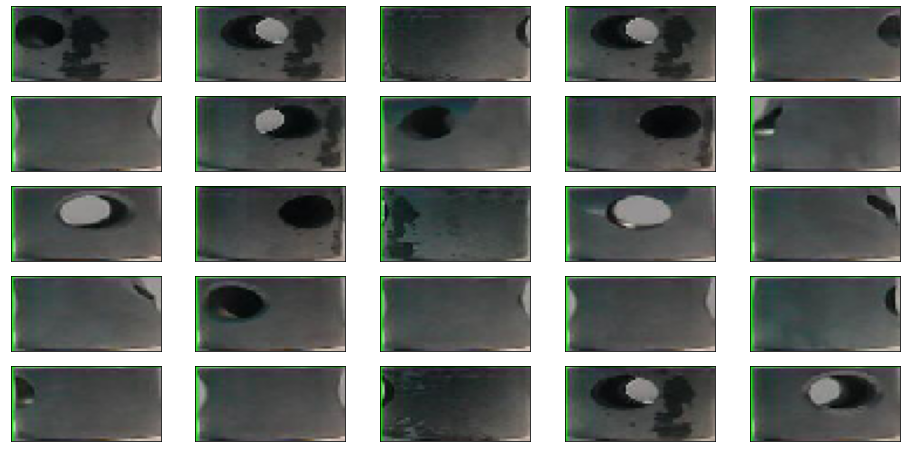

In [1]:
# This function plots images from a folder. 

import glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import random

def plot_images(source_path):
    files=[]
    classes = glob.glob(source_path + '/*')
    for class_path in classes:
        files.extend([f for f in glob.glob(class_path + "/*", recursive=True)])
    random.shuffle(files)
    plt.figure(figsize=(16, 8))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        img = image.load_img(files[i], target_size=(32, 64))
        plt.imshow(img, cmap=plt.cm.binary)
    plt.show()
    
plot_images('data/train_data')

In [2]:
IMG_HEIGHT = 80
IMG_WIDTH = 80

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(directory='data/train_data',
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 228 images belonging to 3 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Dense(24, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    Flatten(),
    Dense(3)
])

In [4]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.0001),
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80, 80, 24)        96        
                                                                 
 flatten (Flatten)           (None, 153600)            0         
                                                                 
 dense_1 (Dense)             (None, 3)                 460803    
                                                                 
Total params: 460,899
Trainable params: 460,899
Non-trainable params: 0
_________________________________________________________________


/home/studio-lab-user/.conda/envs/test_env/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [5]:
history = model.fit_generator(train_data_gen, epochs=5)

Epoch 1/5


<ipython-input-5-1d2cf8d00184>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen, epochs=5)


8/8 [==============================] - 1s 35ms/step - loss: 1.0860 - accuracy: 0.3421
Epoch 2/5
8/8 [==============================] - 0s 35ms/step - loss: 1.0218 - accuracy: 0.4254
Epoch 3/5
8/8 [==============================] - 0s 37ms/step - loss: 0.9400 - accuracy: 0.5614
Epoch 4/5
8/8 [==============================] - 0s 28ms/step - loss: 0.8951 - accuracy: 0.6974
Epoch 5/5
8/8 [==============================] - 0s 27ms/step - loss: 0.8425 - accuracy: 0.6184
